<a href="https://colab.research.google.com/github/dede0702/kmeans_wine_analysis./blob/main/kmeans_wine_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introdução
No projeto proposto, o objetivo é aplicar o algoritmo de agrupamento K-means para segmentar vinhos com características similares, utilizando um conjunto de dados que contém diversas propriedades químicas dos vinhos. A análise visa criar clusters de vinhos que compartilhem atributos comuns, facilitando a identificação de padrões entre eles, como teor alcoólico, acidez e outras características relevantes. O K-means é um algoritmo amplamente utilizado para problemas de agrupamento, onde o número de grupos é pré-definido e o algoritmo busca otimizar a posição dos centróides para minimizar a distância dentro de cada cluster. Além disso, métodos como Elbow e Silhouette Score serão usados para identificar o número ideal de clusters, garantindo que o agrupamento seja o mais representativo possível.

In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [ ]:
# Carregar o dataset
# Aqui estamos carregando os dados de vinhos diretamente do arquivo CSV
df = pd.read_csv('/content/wines.csv')

In [ ]:
df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df, df.shape

(     Class  Alcohol  Malic_acid   Ash   Alcalinity_of_ash  Magnesium  \
 0        1    14.23        1.71  2.43                15.6        127   
 1        1    13.20        1.78  2.14                11.2        100   
 2        1    13.16        2.36  2.67                18.6        101   
 3        1    14.37        1.95  2.50                16.8        113   
 4        1    13.24        2.59  2.87                21.0        118   
 ..     ...      ...         ...   ...                 ...        ...   
 173      3    13.71        5.65  2.45                20.5         95   
 174      3    13.40        3.91  2.48                23.0        102   
 175      3    13.27        4.28  2.26                20.0        120   
 176      3    13.17        2.59  2.37                20.0        120   
 177      3    14.13        4.10  2.74                24.5         96   
 
      Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
 0             2.80        3.06                 

In [ ]:
# Selecionar as features relevantes
# Definimos as variáveis que serão usadas para o agrupamento.
# Escolhemos as que são numéricas e relacionadas às propriedades químicas dos vinhos
# Verifique se os nomes das colunas estão corretos,
# incluindo maiúsculas e minúsculas, espaços em branco, etc.
# use df.columns para ver os nomes das colunas disponíveis
print(df.columns) # Imprime os nomes das colunas para verificação

Index(['Class', 'Alcohol', 'Malic_acid', ' Ash', ' Alcalinity_of_ash',
       'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       'OD280/OD315_of_diluted_wines', 'Proline'],
      dtype='object')


In [ ]:
# Corrigindo os nomes das colunas no features para corresponder ao DataFrame
features = ['Alcohol', 'Malic_acid', ' Ash', ' Alcalinity_of_ash', 'Magnesium',
            'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins']

In [ ]:
# Corrigido: nomes das colunas ajustados para corresponder ao DataFrame
X = df[features]

In [ ]:
# Verificar se existem valores nulos
# Aqui, verificamos se há dados faltantes (nulos) no dataset
print(X.isnull().sum())

Alcohol                 0
Malic_acid              0
 Ash                    0
 Alcalinity_of_ash      0
Magnesium               0
Total_phenols           0
Flavanoids              0
Nonflavanoid_phenols    0
Proanthocyanins         0
dtype: int64


In [ ]:
# Preencher valores nulos com a média da coluna (se houver)
# Se houver valores nulos, preenchê-los com a média da coluna correspondente
X.fillna(X.mean(), inplace=True)

<ipython-input-28-57eb9bc69339>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


In [ ]:
# Padronizar os dados
# Como o algoritmo K-means é sensível à escala das variáveis, utilizamos o StandardScaler para padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Encontrar o número ideal de clusters com o método Elbow
# Aqui utilizamos o método Elbow, que nos ajuda a visualizar o ponto onde o aumento do número de clusters não melhora significativamente o agrupamento
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

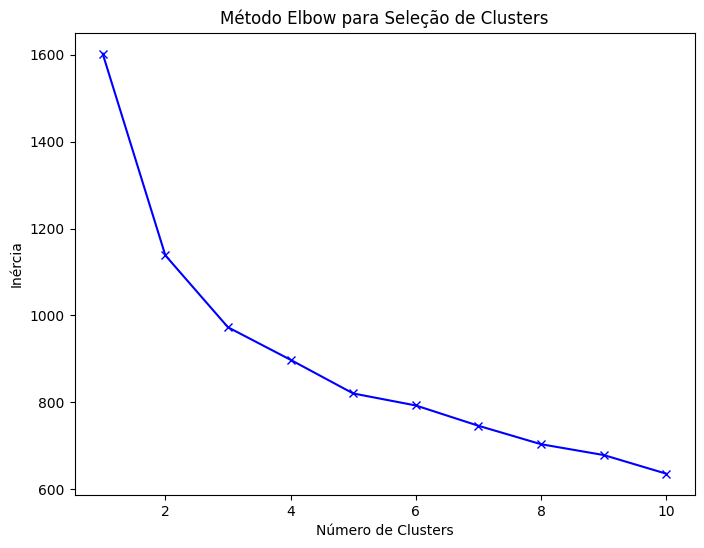

In [ ]:
# Plotar o gráfico Elbow
# O gráfico Elbow mostra a inércia (soma das distâncias dos pontos ao centróide) e nos ajuda a definir o número de clusters ideal
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método Elbow para Seleção de Clusters')
plt.show()

In [ ]:
# Utilizar o Silhouette Score para escolher o número ideal de clusters
# O Silhouette Score mede a coesão e separação dos clusters, ajudando a determinar a qualidade do agrupamento
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

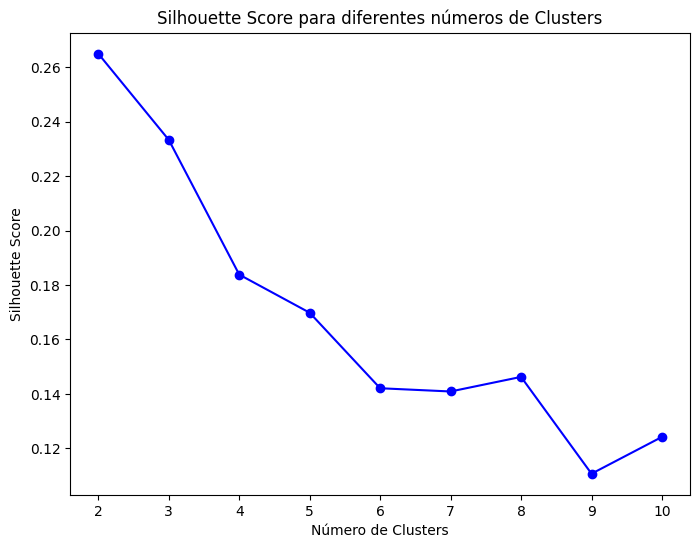

In [ ]:
# Plotar o Silhouette Score
# Este gráfico mostra o Silhouette Score para diferentes números de clusters e auxilia na escolha do número de grupos
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, 'bo-')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para diferentes números de Clusters')
plt.show()

In [ ]:
# Definir o número de clusters com base nos métodos Elbow e Silhouette
# Aqui definimos o número de clusters com base nos resultados dos métodos Elbow e Silhouette
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

In [ ]:
# Adicionar os clusters ao dataframe original
# Atribuímos os rótulos dos clusters aos dados originais para futuras análises
df['Cluster'] = labels

In [ ]:
# Analisar as médias dos grupos (clusters)
# Agrupamos os vinhos por clusters e calculamos as médias das variáveis em cada grupo
grouped = df.groupby('Cluster').mean()

In [ ]:
# Mostrar as características médias dos grupos
# Exibimos as médias de algumas variáveis importantes (como teor alcoólico e acidez)
print(grouped[['Alcohol', 'Malic_acid', ' Ash']])


           Alcohol  Malic_acid       Ash
Cluster                                 
0        12.332200    1.860800  2.131400
1        12.860286    2.970571  2.420714
2        13.746207    1.980862  2.503793


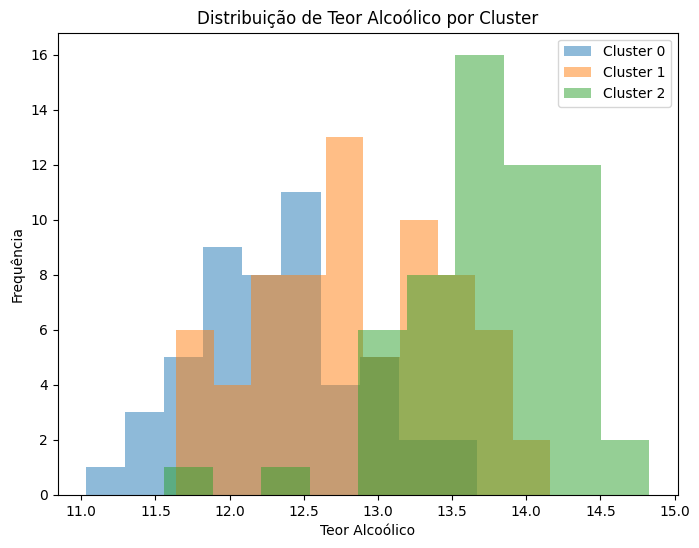

In [ ]:
# Visualizar a distribuição dos clusters em termos de teor alcoólico
# Criamos gráficos de histograma para ver como o teor alcoólico está distribuído entre os clusters
plt.figure(figsize=(8, 6))
for cluster in range(3):
    plt.hist(df[df['Cluster'] == cluster]['Alcohol'], bins=10, alpha=0.5, label=f'Cluster {cluster}')
plt.xlabel('Teor Alcoólico')
plt.ylabel('Frequência')
plt.title('Distribuição de Teor Alcoólico por Cluster')
plt.legend()
plt.show()

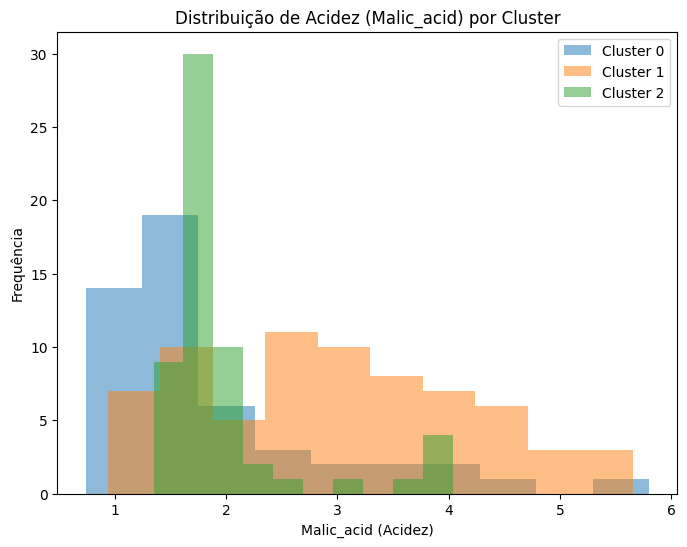

In [ ]:
# Visualizar a distribuição de acidez (Malicacid) por cluster
# O mesmo procedimento é feito para a acidez (Malic Acid), comparando entre os clusters
plt.figure(figsize=(8, 6))
for cluster in range(3):
    plt.hist(df[df['Cluster'] == cluster]['Malic_acid'], bins=10, alpha=0.5, label=f'Cluster {cluster}')
plt.xlabel('Malic_acid (Acidez)')
plt.ylabel('Frequência')
plt.title('Distribuição de Acidez (Malic_acid) por Cluster')
plt.legend()
plt.show()

In [ ]:
# Análise detalhada de cada grupo
# Aqui fornecemos uma análise descritiva detalhada de cada cluster, comparando todas as variáveis
for cluster in range(3):
    print(f"\nCluster {cluster}:")
    print(df[df['Cluster'] == cluster].describe())


Cluster 0:
           Class    Alcohol  Malic_acid        Ash   Alcalinity_of_ash  \
count  50.000000  50.000000   50.000000  50.000000           50.000000   
mean    1.880000  12.332200    1.860800   2.131400           18.776000   
std     0.328261   0.559611    1.032018   0.265538            2.886532   
min     1.000000  11.030000    0.740000   1.360000           10.600000   
25%     2.000000  12.000000    1.195000   1.957500           17.850000   
50%     2.000000  12.335000    1.565000   2.140000           19.000000   
75%     2.000000  12.652500    2.057500   2.297500           21.000000   
max     2.000000  13.670000    5.800000   2.700000           24.500000   

        Magnesium  Total_phenols  Flavanoids  Nonflavanoid_phenols  \
count   50.000000      50.000000   50.000000             50.000000   
mean    92.440000       2.443200    2.289200              0.304600   
std     12.945979       0.453478    0.580534              0.082467   
min     70.000000       1.450000    0.570

#Conclusão
Após a aplicação do algoritmo K-means no conjunto de dados dos vinhos, conseguimos identificar grupos com características similares. Com o uso dos métodos Elbow e Silhouette, definimos o número de clusters mais adequado, o que nos permitiu segmentar os vinhos de maneira eficaz. A análise mostrou que os vinhos dentro de cada cluster compartilham propriedades químicas, como teor alcoólico e acidez, fornecendo insights sobre as diferenças entre os grupos. Isso pode ser útil tanto para o mercado vinícola, quanto para estudos mais aprofundados sobre as características que tornam cada vinho único.

O uso do K-means se mostrou uma abordagem eficiente para esse tipo de problema de agrupamento não supervisionado, fornecendo uma visão clara e separando os vinhos com base em suas propriedades químicas.